In [53]:
include("../minima_analysis.jl")

generate_intermediate_patterns (generic function with 1 method)

In [3]:
N1k  = readdlm("julia_data/overlaps/N1000.txt", '\t', Float64, '\n')
N5k  = readdlm("julia_data/overlaps/N5000.txt", '\t', Float64, '\n')
N10k = readdlm("julia_data/overlaps/N10000.txt", '\t', Float64, '\n')
N20k = readdlm("julia_data/overlaps/N20000.txt", '\t', Float64, '\n')

1×800 Matrix{Float64}:
 0.0151  -0.0232  -0.0356  -0.0168  …  -0.0471  0.0192  -0.0293  0.0181

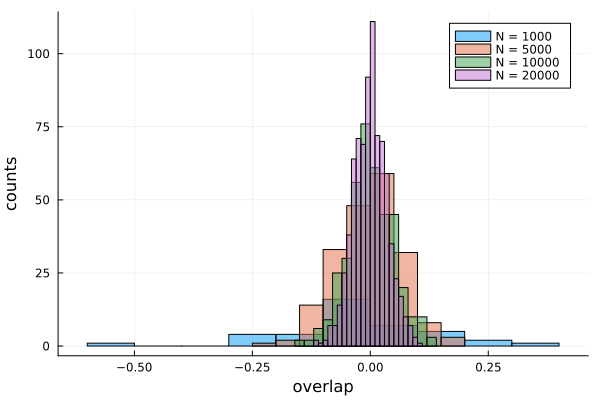

In [4]:
histogram([N1k', N5k', N10k', N20k'], fillalpha = 0.5,
    label = ["N = 1000" "N = 5000" "N = 10000" "N = 20000"], xlabel = "overlap",
ylabel = "counts")

In [6]:
Random.seed!(12)
N = 500
M = 50
ξ = SH.generate_patterns(M, N)
σ1 = ξ[:,1]
σ2 = ξ[:,2]
σ3 = ξ[:,3]
J = SH.store(ξ)

ξ12 = generate_intermediate_patterns(σ1, σ2)#, J)
ξ23 = generate_intermediate_patterns(σ2, σ3)

s12 = size(ξ12, 2)
s23 = size(ξ23, 2)

energies = zeros(s12 + s23 + 1)
energies[1] = SH.energy(J, σ1)
#energies[s12 + 1] = SH.energy(J, σ2)
#energies[end] = SH.energy(J, σ3)

for i in 1:s12
    energies[i + 1] = SH.energy(J, ξ12[:, i])
end

for i in 1:s23
 #   println(i)
    energies[s12 + 1 + i] = SH.energy(J, ξ23[:, i])
end

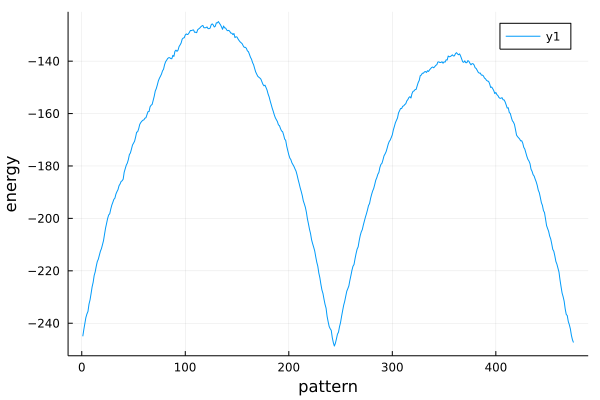

In [7]:
plot(energies, xlabel = "pattern", ylabel = "energy")

## Try to estimate the threshold

In [34]:
t = 500
mf = zeros(t)
N = 1000
α = 0.16
M = round(Int, N*α)
mi = zeros(t)
for i in 1:t

    ξ = SH.generate_patterns(M, N)
    J = SH.store(ξ)

    k = rand(1:M) #select a random pattern
    
    #println(k)
    σ = ξ[:,k]
    σ_new = SH.perturb(σ, 0.2)
    mi[i] = SH.overlap(σ_new, σ)

    σ_new = SH.monte_carlo(σ_new, J; β = 100)
    overlap = σ_new ⋅ σ / N
    #if overlap < minimum
     #   minimum = overlap
    mf[i] = overlap
    #end
end

    #overlaps = (σ_new' * ξ) ./ N



In [2]:
histogram(mf, nbins = 20)

LoadError: UndefVarError: mf not defined

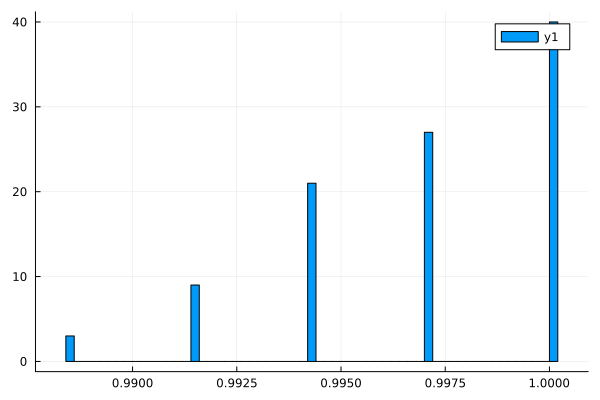

In [46]:
histogram(mi, nbins = 100)

In [47]:
mean(mf .>= mi)

0.35

In [33]:
a = hist_overlaps(; N = 100, show = false, nbins = 30, p = 0.2, β = 100, α = 0.12)

500-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.9
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 0.38
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.38
 1.0

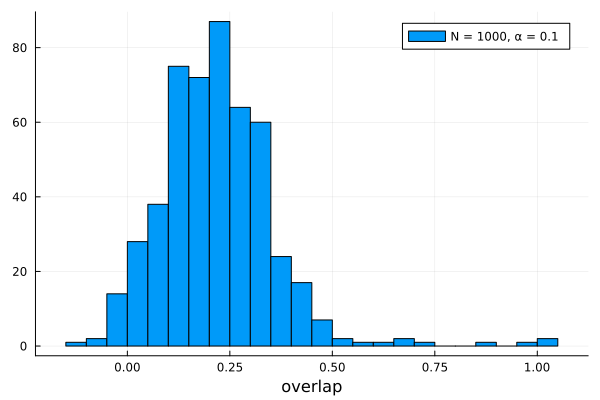

500-element Vector{Float64}:
 0.218
 0.018
 0.148
 0.13
 0.244
 0.196
 0.244
 0.18
 0.302
 0.45
 0.14
 1.0
 0.384
 ⋮
 0.142
 0.294
 0.334
 0.176
 0.19
 0.178
 0.148
 0.082
 0.114
 0.158
 0.102
 0.234

In [52]:
hist_overlaps(; N = 1000, show = true, save = true, nbins = 30, p = 0.4, β = 100, α = 0.1)

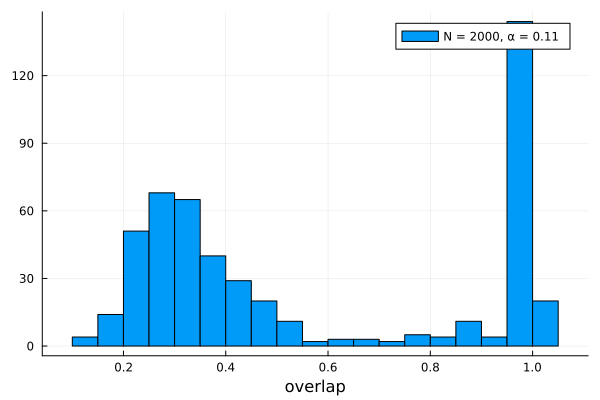

500-element Vector{Float64}:
 0.252
 0.295
 0.386
 0.993
 0.991
 0.194
 0.999
 0.33
 0.311
 0.996
 1.0
 0.993
 0.338
 ⋮
 0.997
 0.996
 0.369
 0.349
 0.226
 0.337
 0.347
 0.995
 0.994
 0.996
 0.313
 0.994

In [68]:
hist_overlaps(; N = 2000, show = true, save = true, nbins = 30, p = 0.3, β = 100, α = 0.11)

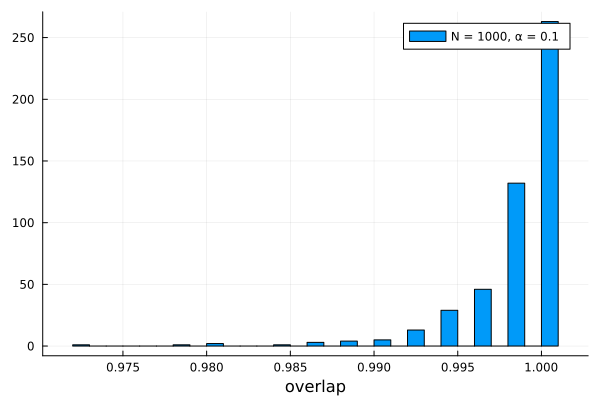

500-element Vector{Float64}:
 0.994
 1.0
 1.0
 1.0
 0.972
 1.0
 1.0
 1.0
 0.998
 1.0
 0.998
 1.0
 1.0
 ⋮
 0.998
 0.998
 1.0
 0.998
 0.996
 1.0
 0.994
 1.0
 1.0
 1.0
 1.0
 1.0

In [64]:
hist_overlaps(; N = 1000, show = true, save = true, nbins = 30, p = 0, β = 100, α = 0.1)